## Import Libraries 

In [1]:
import warnings
import sys
sys.path.insert(0, '../../src')
warnings.filterwarnings('ignore')

In [2]:
import ABC_train_test2
import friedman3Dataset
import network
import dataset
import sanityChecks
import torch 
import scrapbook as sb
from statistics import mean 
import catboost as ctb 
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,mean_absolute_error
import numpy as np
from pytorch_tabnet.tab_model import TabNetRegressor

## Parameters 

In [3]:
variance = 1
bias = 1 

In [4]:
# Parameters
variance = 0.01
bias = 0


## Dataset 


In [5]:
#Parameters 
n_features = 4
n_samples= 100
n_target = 1

In [6]:
X,Y = friedman3Dataset.friedman3_data(n_samples)

          X1           X2        X3        X4         Y
0   9.210225  1406.537542  0.034424  4.187325  1.493737
1  92.235136  1738.495162  0.855068  8.543738  1.475544
2  31.988547  1384.004025  0.746840  4.422493  1.570336
3   0.745229  1306.699738  0.200777  1.860726  1.530757
4  73.580685   309.828242  0.493636  4.925500  1.146773


In [7]:
#Train test split for dataset 
X_train,X_test,Y_train,Y_test = train_test_split(X,Y,test_size = 0.2)
train_data = dataset.CustomDataset(X_train,Y_train)
test_data = dataset.CustomDataset(X_test,Y_test)


## Training Parameters 

In [8]:
batch_size = 32
n_epochs = 1000
#Select the device 
device = torch.device('cuda' if torch.cuda.is_available() else 'cpu')

# ABC Pre-generator Model 

1. The catboost model is used as a pre-generator model for the ABC-GAN. 
2. The model is first trained on the entire dataset 
3. It generats X,Y pairs and we add some Gaussian noise with mean 0 and variance 1 to it which is then feed as input to the generator.


In [9]:
#Train the Model

Y_train = np.reshape(Y_train, (-1, 1))
Y_test = np.reshape(Y_test, (-1, 1))

prior_model = TabNetRegressor(optimizer_fn=torch.optim.Adam, optimizer_params=dict(lr = 0.02),
          #scheduler_params={"step_size":10, ], "gamma":0.9},
          #scheduler_fn=torch.optim.lr_scheduler.StepLR
          )  #TabNetRegressor()

prior_model.fit(X_train,Y_train,eval_set=[(X_train, Y_train)],
            eval_name=['train'], 
            eval_metric=[ 'mse', 'mae'], 
            max_epochs = n_epochs, 
            batch_size = batch_size,
            patience=50
            )

Device used : cpu


epoch 0  | loss: 0.94593 | train_mse: 5.919   | train_mae: 1.66515 |  0:00:00s
epoch 1  | loss: 0.67337 | train_mse: 3.49663 | train_mae: 1.47827 |  0:00:00s
epoch 2  | loss: 0.54434 | train_mse: 2.63205 | train_mae: 1.26771 |  0:00:00s


epoch 3  | loss: 0.4741  | train_mse: 2.48018 | train_mae: 1.19098 |  0:00:00s
epoch 4  | loss: 0.42493 | train_mse: 1.9601  | train_mae: 1.08699 |  0:00:00s
epoch 5  | loss: 0.41285 | train_mse: 2.31401 | train_mae: 1.11287 |  0:00:00s


epoch 6  | loss: 0.3948  | train_mse: 1.72434 | train_mae: 0.96721 |  0:00:00s
epoch 7  | loss: 0.56677 | train_mse: 1.71838 | train_mae: 0.97196 |  0:00:00s
epoch 8  | loss: 0.43257 | train_mse: 1.13629 | train_mae: 0.82627 |  0:00:00s


epoch 9  | loss: 0.37648 | train_mse: 0.73331 | train_mae: 0.65963 |  0:00:00s
epoch 10 | loss: 0.29423 | train_mse: 1.01547 | train_mae: 0.73399 |  0:00:00s
epoch 11 | loss: 0.256   | train_mse: 1.37533 | train_mae: 0.89025 |  0:00:01s


epoch 12 | loss: 0.26277 | train_mse: 1.12721 | train_mae: 0.77412 |  0:00:01s
epoch 13 | loss: 0.22582 | train_mse: 0.52669 | train_mae: 0.51821 |  0:00:01s


epoch 14 | loss: 0.34574 | train_mse: 0.37853 | train_mae: 0.41803 |  0:00:01s
epoch 15 | loss: 0.20557 | train_mse: 0.51351 | train_mae: 0.48037 |  0:00:01s
epoch 16 | loss: 0.22315 | train_mse: 0.71878 | train_mae: 0.58929 |  0:00:01s


epoch 17 | loss: 0.22555 | train_mse: 0.59006 | train_mae: 0.54464 |  0:00:01s
epoch 18 | loss: 0.21008 | train_mse: 0.59995 | train_mae: 0.54867 |  0:00:01s
epoch 19 | loss: 0.19707 | train_mse: 0.37533 | train_mae: 0.43408 |  0:00:01s


epoch 20 | loss: 0.16177 | train_mse: 0.31709 | train_mae: 0.41815 |  0:00:01s
epoch 21 | loss: 0.14624 | train_mse: 0.36802 | train_mae: 0.45372 |  0:00:02s
epoch 22 | loss: 0.28376 | train_mse: 0.37765 | train_mae: 0.43318 |  0:00:02s


epoch 23 | loss: 0.16864 | train_mse: 0.29266 | train_mae: 0.39628 |  0:00:02s
epoch 24 | loss: 0.12226 | train_mse: 0.20508 | train_mae: 0.35527 |  0:00:02s
epoch 25 | loss: 0.11628 | train_mse: 0.15667 | train_mae: 0.30869 |  0:00:02s


epoch 26 | loss: 0.13741 | train_mse: 0.14255 | train_mae: 0.30764 |  0:00:02s
epoch 27 | loss: 0.15104 | train_mse: 0.13342 | train_mae: 0.29004 |  0:00:02s


epoch 28 | loss: 0.09796 | train_mse: 0.13053 | train_mae: 0.28447 |  0:00:02s
epoch 29 | loss: 0.14433 | train_mse: 0.1326  | train_mae: 0.28295 |  0:00:02s
epoch 30 | loss: 0.1437  | train_mse: 0.13168 | train_mae: 0.27661 |  0:00:02s


epoch 31 | loss: 0.0931  | train_mse: 0.13338 | train_mae: 0.28887 |  0:00:02s
epoch 32 | loss: 0.09322 | train_mse: 0.16605 | train_mae: 0.32848 |  0:00:03s
epoch 33 | loss: 0.13795 | train_mse: 0.14658 | train_mae: 0.30469 |  0:00:03s


epoch 34 | loss: 0.08945 | train_mse: 0.11152 | train_mae: 0.26513 |  0:00:03s
epoch 35 | loss: 0.09284 | train_mse: 0.08966 | train_mae: 0.23814 |  0:00:03s
epoch 36 | loss: 0.1859  | train_mse: 0.09613 | train_mae: 0.23817 |  0:00:03s


epoch 37 | loss: 0.14926 | train_mse: 0.13184 | train_mae: 0.25201 |  0:00:03s
epoch 38 | loss: 0.1068  | train_mse: 0.13979 | train_mae: 0.25159 |  0:00:03s
epoch 39 | loss: 0.24661 | train_mse: 0.10651 | train_mae: 0.23345 |  0:00:03s


epoch 40 | loss: 0.21079 | train_mse: 0.12024 | train_mae: 0.23072 |  0:00:03s
epoch 41 | loss: 0.15594 | train_mse: 0.09204 | train_mae: 0.21477 |  0:00:03s
epoch 42 | loss: 0.12564 | train_mse: 0.08732 | train_mae: 0.21194 |  0:00:03s


epoch 43 | loss: 0.17543 | train_mse: 0.10411 | train_mae: 0.22952 |  0:00:03s
epoch 44 | loss: 0.09371 | train_mse: 0.09716 | train_mae: 0.24036 |  0:00:03s
epoch 45 | loss: 0.12303 | train_mse: 0.08353 | train_mae: 0.22665 |  0:00:04s


epoch 46 | loss: 0.17825 | train_mse: 0.07194 | train_mae: 0.21035 |  0:00:04s
epoch 47 | loss: 0.18179 | train_mse: 0.06104 | train_mae: 0.19794 |  0:00:04s
epoch 48 | loss: 0.09508 | train_mse: 0.06793 | train_mae: 0.21057 |  0:00:04s
epoch 49 | loss: 0.49268 | train_mse: 0.07628 | train_mae: 0.21438 |  0:00:04s


epoch 50 | loss: 0.15545 | train_mse: 0.10044 | train_mae: 0.24685 |  0:00:04s
epoch 51 | loss: 0.30289 | train_mse: 0.14254 | train_mae: 0.27272 |  0:00:04s


epoch 52 | loss: 0.17056 | train_mse: 0.10402 | train_mae: 0.25589 |  0:00:04s
epoch 53 | loss: 0.0823  | train_mse: 0.09443 | train_mae: 0.23758 |  0:00:04s
epoch 54 | loss: 0.15544 | train_mse: 0.09099 | train_mae: 0.22788 |  0:00:04s


epoch 55 | loss: 0.18262 | train_mse: 0.09308 | train_mae: 0.24108 |  0:00:04s
epoch 56 | loss: 0.05749 | train_mse: 0.11989 | train_mae: 0.25759 |  0:00:04s
epoch 57 | loss: 0.10943 | train_mse: 0.0935  | train_mae: 0.23723 |  0:00:04s


epoch 58 | loss: 0.16602 | train_mse: 0.0961  | train_mae: 0.23404 |  0:00:04s
epoch 59 | loss: 0.13374 | train_mse: 0.08919 | train_mae: 0.23733 |  0:00:05s
epoch 60 | loss: 0.27413 | train_mse: 0.07375 | train_mae: 0.22095 |  0:00:05s
epoch 61 | loss: 0.06933 | train_mse: 0.06136 | train_mae: 0.20365 |  0:00:05s


epoch 62 | loss: 0.18407 | train_mse: 0.06563 | train_mae: 0.20597 |  0:00:05s
epoch 63 | loss: 0.1208  | train_mse: 0.06994 | train_mae: 0.21344 |  0:00:05s
epoch 64 | loss: 0.16065 | train_mse: 0.0663  | train_mae: 0.2194  |  0:00:05s


epoch 65 | loss: 0.13525 | train_mse: 0.06336 | train_mae: 0.21033 |  0:00:05s
epoch 66 | loss: 0.14262 | train_mse: 0.05613 | train_mae: 0.19636 |  0:00:05s
epoch 67 | loss: 0.13846 | train_mse: 0.05527 | train_mae: 0.19097 |  0:00:05s


epoch 68 | loss: 0.21266 | train_mse: 0.06778 | train_mae: 0.19955 |  0:00:05s
epoch 69 | loss: 0.12873 | train_mse: 0.09308 | train_mae: 0.21585 |  0:00:05s
epoch 70 | loss: 0.21862 | train_mse: 0.10735 | train_mae: 0.2286  |  0:00:05s
epoch 71 | loss: 0.11603 | train_mse: 0.08693 | train_mae: 0.22322 |  0:00:05s


epoch 72 | loss: 0.18249 | train_mse: 0.08724 | train_mae: 0.23999 |  0:00:05s
epoch 73 | loss: 0.21428 | train_mse: 0.08753 | train_mae: 0.24162 |  0:00:06s
epoch 74 | loss: 0.10142 | train_mse: 0.06823 | train_mae: 0.21158 |  0:00:06s
epoch 75 | loss: 0.13314 | train_mse: 0.06661 | train_mae: 0.21087 |  0:00:06s


epoch 76 | loss: 0.1833  | train_mse: 0.08017 | train_mae: 0.21596 |  0:00:06s
epoch 77 | loss: 0.14327 | train_mse: 0.05059 | train_mae: 0.18288 |  0:00:06s
epoch 78 | loss: 0.13624 | train_mse: 0.11096 | train_mae: 0.23928 |  0:00:06s


epoch 79 | loss: 0.10126 | train_mse: 0.10658 | train_mae: 0.24249 |  0:00:06s
epoch 80 | loss: 0.13519 | train_mse: 0.06567 | train_mae: 0.20803 |  0:00:06s
epoch 81 | loss: 0.21337 | train_mse: 0.05495 | train_mae: 0.18947 |  0:00:06s


epoch 82 | loss: 0.16168 | train_mse: 0.05995 | train_mae: 0.20411 |  0:00:06s
epoch 83 | loss: 0.11553 | train_mse: 0.0749  | train_mae: 0.21694 |  0:00:06s
epoch 84 | loss: 0.29015 | train_mse: 0.07398 | train_mae: 0.21187 |  0:00:06s
epoch 85 | loss: 0.08417 | train_mse: 0.05759 | train_mae: 0.19041 |  0:00:06s


epoch 86 | loss: 0.1718  | train_mse: 0.05227 | train_mae: 0.18892 |  0:00:06s
epoch 87 | loss: 0.19842 | train_mse: 0.04581 | train_mae: 0.18006 |  0:00:07s
epoch 88 | loss: 0.07669 | train_mse: 0.04879 | train_mae: 0.18205 |  0:00:07s
epoch 89 | loss: 0.21995 | train_mse: 0.06933 | train_mae: 0.21306 |  0:00:07s


epoch 90 | loss: 0.14853 | train_mse: 0.05994 | train_mae: 0.20948 |  0:00:07s
epoch 91 | loss: 0.1659  | train_mse: 0.06366 | train_mae: 0.2078  |  0:00:07s
epoch 92 | loss: 0.15234 | train_mse: 0.06525 | train_mae: 0.20958 |  0:00:07s


epoch 93 | loss: 0.09975 | train_mse: 0.05913 | train_mae: 0.20382 |  0:00:07s
epoch 94 | loss: 0.12216 | train_mse: 0.05798 | train_mae: 0.20566 |  0:00:07s
epoch 95 | loss: 0.08158 | train_mse: 0.06158 | train_mae: 0.19766 |  0:00:07s
epoch 96 | loss: 0.0784  | train_mse: 0.06671 | train_mae: 0.20761 |  0:00:07s


epoch 97 | loss: 0.14292 | train_mse: 0.06162 | train_mae: 0.20671 |  0:00:07s
epoch 98 | loss: 0.12332 | train_mse: 0.06911 | train_mae: 0.21098 |  0:00:07s
epoch 99 | loss: 0.15059 | train_mse: 0.07408 | train_mae: 0.21573 |  0:00:07s
epoch 100| loss: 0.14998 | train_mse: 0.0589  | train_mae: 0.19558 |  0:00:07s


epoch 101| loss: 0.12314 | train_mse: 0.05873 | train_mae: 0.19707 |  0:00:07s
epoch 102| loss: 0.1423  | train_mse: 0.07212 | train_mae: 0.20984 |  0:00:08s
epoch 103| loss: 0.10645 | train_mse: 0.06702 | train_mae: 0.20652 |  0:00:08s
epoch 104| loss: 0.17176 | train_mse: 0.06712 | train_mae: 0.20243 |  0:00:08s


epoch 105| loss: 0.11396 | train_mse: 0.06115 | train_mae: 0.19452 |  0:00:08s
epoch 106| loss: 0.10171 | train_mse: 0.06562 | train_mae: 0.21839 |  0:00:08s
epoch 107| loss: 0.17928 | train_mse: 0.0843  | train_mae: 0.23677 |  0:00:08s
epoch 108| loss: 0.12895 | train_mse: 0.08595 | train_mae: 0.23754 |  0:00:08s


epoch 109| loss: 0.09468 | train_mse: 0.06563 | train_mae: 0.21457 |  0:00:08s
epoch 110| loss: 0.15513 | train_mse: 0.06634 | train_mae: 0.2208  |  0:00:08s
epoch 111| loss: 0.09687 | train_mse: 0.06095 | train_mae: 0.20676 |  0:00:08s
epoch 112| loss: 0.1293  | train_mse: 0.06239 | train_mae: 0.20791 |  0:00:08s


epoch 113| loss: 0.0809  | train_mse: 0.06475 | train_mae: 0.21038 |  0:00:08s
epoch 114| loss: 0.11378 | train_mse: 0.06291 | train_mae: 0.21093 |  0:00:08s
epoch 115| loss: 0.07121 | train_mse: 0.07459 | train_mae: 0.22388 |  0:00:09s
epoch 116| loss: 0.18148 | train_mse: 0.08621 | train_mae: 0.23584 |  0:00:09s


epoch 117| loss: 0.1466  | train_mse: 0.07035 | train_mae: 0.21624 |  0:00:09s
epoch 118| loss: 0.22122 | train_mse: 0.10384 | train_mae: 0.24841 |  0:00:09s
epoch 119| loss: 0.12255 | train_mse: 0.08803 | train_mae: 0.22997 |  0:00:09s


epoch 120| loss: 0.41339 | train_mse: 0.07144 | train_mae: 0.21646 |  0:00:09s
epoch 121| loss: 0.10139 | train_mse: 0.07904 | train_mae: 0.22536 |  0:00:09s
epoch 122| loss: 0.08243 | train_mse: 0.09699 | train_mae: 0.24899 |  0:00:09s


epoch 123| loss: 0.15668 | train_mse: 0.11081 | train_mae: 0.26001 |  0:00:09s
epoch 124| loss: 0.15147 | train_mse: 0.09581 | train_mae: 0.25403 |  0:00:09s
epoch 125| loss: 0.07951 | train_mse: 0.08057 | train_mae: 0.24108 |  0:00:09s
epoch 126| loss: 0.09857 | train_mse: 0.0636  | train_mae: 0.22008 |  0:00:09s


epoch 127| loss: 0.18176 | train_mse: 0.0632  | train_mae: 0.21672 |  0:00:09s
epoch 128| loss: 0.19244 | train_mse: 0.05579 | train_mae: 0.20521 |  0:00:09s
epoch 129| loss: 0.11319 | train_mse: 0.05819 | train_mae: 0.2024  |  0:00:09s


epoch 130| loss: 0.11336 | train_mse: 0.05741 | train_mae: 0.19985 |  0:00:10s
epoch 131| loss: 0.15826 | train_mse: 0.06188 | train_mae: 0.20925 |  0:00:10s
epoch 132| loss: 0.10467 | train_mse: 0.06016 | train_mae: 0.20773 |  0:00:10s
epoch 133| loss: 0.19827 | train_mse: 0.06774 | train_mae: 0.2147  |  0:00:10s


epoch 134| loss: 0.17931 | train_mse: 0.06084 | train_mae: 0.20222 |  0:00:10s
epoch 135| loss: 0.14819 | train_mse: 0.07563 | train_mae: 0.21206 |  0:00:10s
epoch 136| loss: 0.18472 | train_mse: 0.0855  | train_mae: 0.21674 |  0:00:10s


epoch 137| loss: 0.20822 | train_mse: 0.06519 | train_mae: 0.19998 |  0:00:10s

Early stopping occurred at epoch 137 with best_epoch = 87 and best_train_mae = 0.18006
Best weights from best epoch are automatically used!


In [10]:
y_pred = prior_model.predict(X_test)
y_abc = y_pred + np.random.normal(0,variance, y_pred.shape) + bias 
mse = mean_squared_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mse)
mse = mean_squared_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mse)
mae = mean_absolute_error(y_pred,Y_test)
sb.glue("Prior Model MSE",mae)
mae = mean_absolute_error(y_abc,Y_test)
sb.glue("ABC Pre-generator MSE",mae)

# ABC GAN Model

In [11]:
gen = network.Generator(n_features+1).to(device)
disc = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc.parameters(), lr=0.001, betas=(0.5, 0.999))

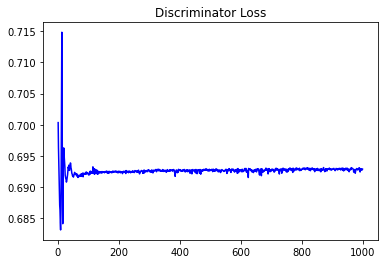

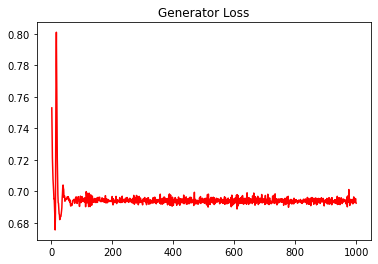

In [12]:
#Training the ABC_GAN 
ABC_train_test2.training_GAN(disc,gen,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [13]:
ABC_GAN1_metrics=ABC_train_test2.test_generator(gen,test_data,prior_model,variance,bias,"1",device)
sb.glue("ABC_GAN_1 Metrics",ABC_GAN1_metrics)

print("MSE")
print(mean(ABC_GAN1_metrics[0]))

MSE
0.29460571373725375


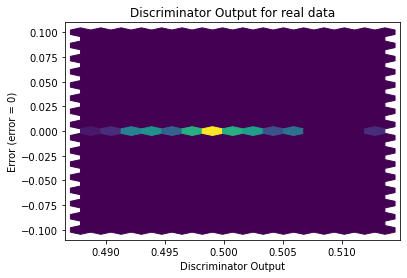

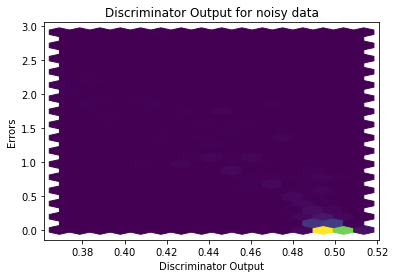

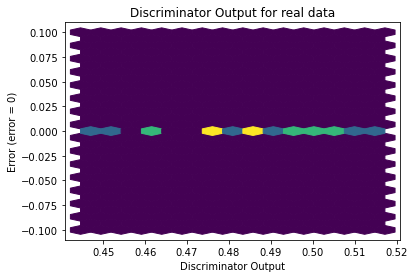

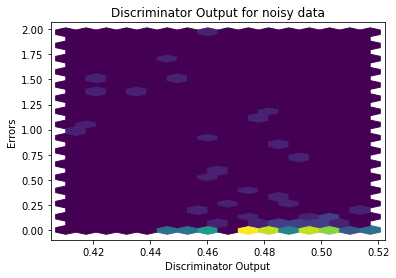

In [14]:
sanityChecks.discProbVsError(train_data,disc,device)
sanityChecks.discProbVsError(test_data,disc,device)

# ABC - GAN Model with skip connection

In [15]:
#Generator
gen3 = network.GeneratorWithSkipConnection(n_features+1).to(device)
constraints=network.weightConstraint()
#Discriminator 
disc3 = network.Discriminator(n_features+1).to(device)

criterion = torch.nn.BCELoss()
gen_opt = torch.optim.Adam(gen3.parameters(), lr=0.001, betas=(0.5, 0.999))
disc_opt = torch.optim.Adam(disc3.parameters(), lr=0.001, betas=(0.5, 0.999))


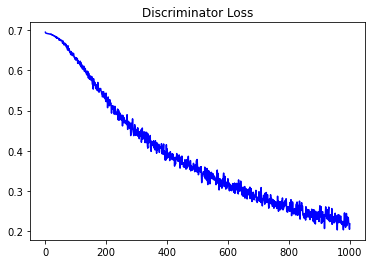

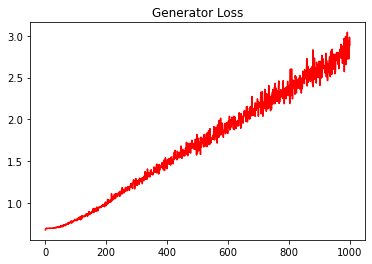

In [16]:
ABC_train_test2.training_GAN_skip_connection(disc3,gen3,disc_opt,gen_opt,train_data,batch_size,n_epochs,criterion,prior_model,variance,bias,device)

In [17]:
ABC_GAN3_metrics=ABC_train_test2.test_generator(gen3,test_data,prior_model,variance,bias,"3",device)
sb.glue("ABC_GAN_3 Metrics",ABC_GAN3_metrics)

print("MSE")
print(mean(ABC_GAN3_metrics[0]))

MSE
0.20176103886371458


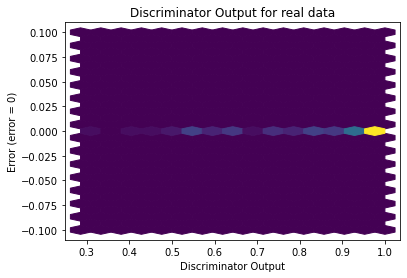

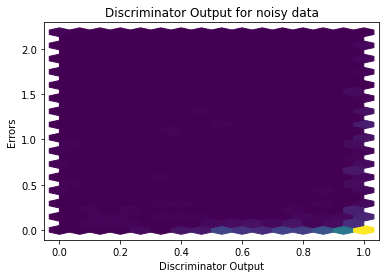

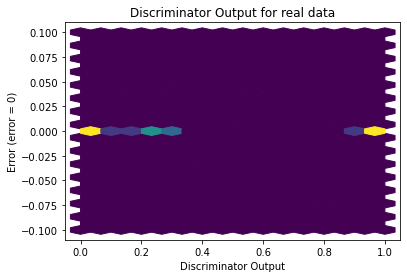

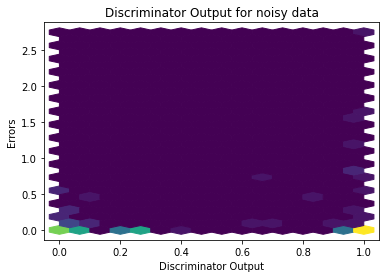

In [18]:
sanityChecks.discProbVsError(train_data,disc3,device)
sanityChecks.discProbVsError(test_data,disc3,device)

## Skip Connection Model Analysis - ABC-GAN 

### Weight Analysis 

Study the weights of the skip connection layer

Equation of the skip connection is 

$output = y_{gan} * w + y_{abc} * (1-w)$

In [19]:
print("Weight of the node at skip connection")
for name,param in gen3.named_parameters():
    if(name == "skipNode.weight"):
        print(param)
        sb.glue("Skip Connection Weight",param.item())

Weight of the node at skip connection
Parameter containing:
tensor([[0.]], requires_grad=True)
